In [3]:
import pandas as pd
import numpy as num
import statsmodels.api as sm
from datetime import timedelta

C:\Users\Carlos Bonilla\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [16]:
#Upload csv and excel datasets
Savefolder = "C:\\Users\\Carlos Bonilla\\Google Drive\\Wharton\\Clubs\\Wharton Analytic Fellows\\"
Fitting_Data_All=pd.read_excel(Savefolder+"Fittting Data (World Bank Global Economic Indicators) v4.xlsx", sheet_name="Data")
ECRCountriesFitted = pd.read_excel(Savefolder+"ECRCountriesFitted.xlsx", sheet_name=None)

In [6]:
#Prepare ECR General score data for analysis
ECR=pd.read_excel(Savefolder+"ECR Testing Data.xlsx", sheet_name='ECR_SubScores')

#ECR.groupby(pd.TimeGrouper(freq='M'),'country').mean()
#ECR.groupby('country',pd.TimeGrouper(freq='M')).mean()
ECRA = ECR.pivot(index='date', columns='country', values='General_Score')
ECRA = ECRA.resample('M').mean()
ECRA['date'] = pd.to_datetime(ECRA.index)

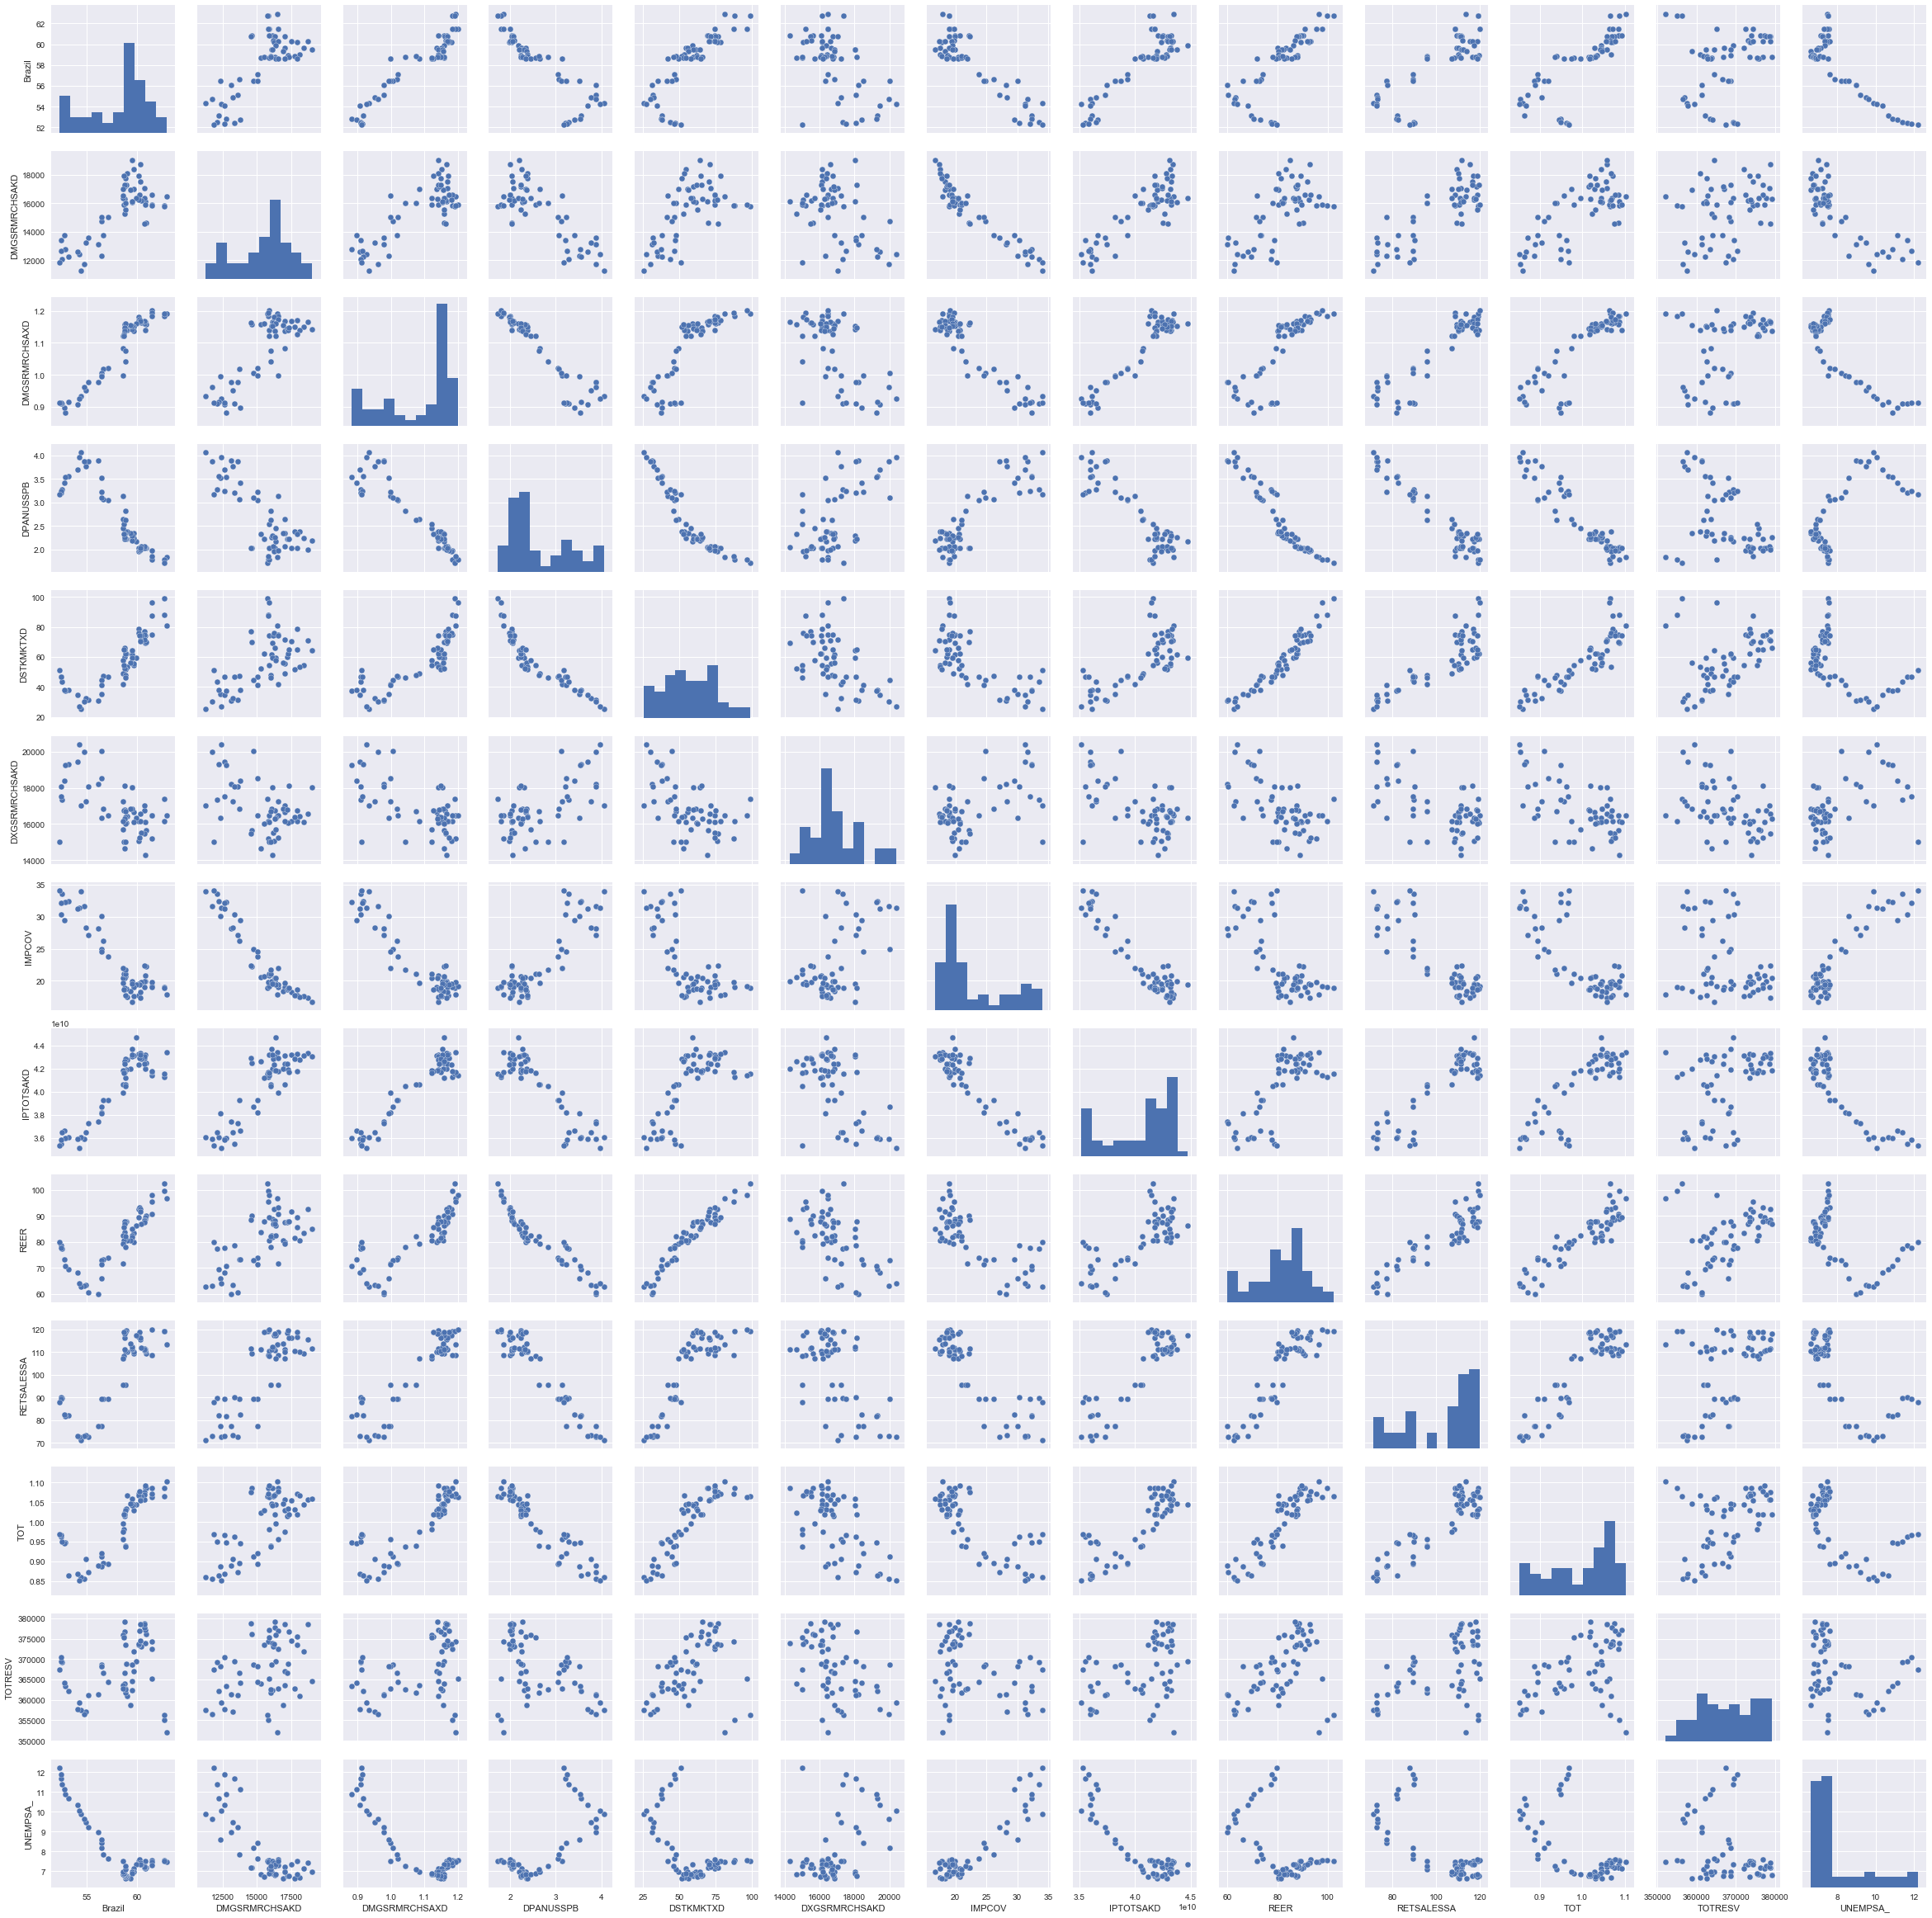

In [64]:
#Chart for identifying highly correlated variables
import seaborn as sns

tempDf = Fitting_Data_All.loc[Fitting_Data_All['Country'] == 'Brazil']
del tempDf['Country Code']
del tempDf['Series']
del tempDf['Country']
tempDf = pd.melt(tempDf, id_vars=["Series Code"],var_name="date")
tempDf = tempDf.pivot(index='date', columns='Series Code', values='value')
tempDf['date'] = tempDf.index
tempDf = pd.merge(ECRA[['Brazil','date']],tempDf, how='left', on='date',left_index=False, 
                  right_index=False, sort=False, copy=True, indicator=False)
tempDf = tempDf.dropna(axis=1, how='any')
#subDf = tempDf[0:28]
#del subDf['REER']
#del subDf['DPANUSSPB']
#del subDf['IMPCOV']

#subDf
sns.pairplot(tempDf)
sns.plt.show()

In [176]:
#Windowed looping model
#this model fits a linear regression in rolling 28 period increments
#the columns deleted from the subDf either added multicollinearity or had NaNs

import statsmodels.api as sm

dateAndCountryDict = {}

for theCountry in ECRCountriesFitted['Country'].unique():
    
    singleCountryDict = {}    
    
    for x in range(0, len( pd.to_datetime(ECRA.index))-12):
        try:
            print(theCountry)
            tempDf = Fitting_Data_All.loc[Fitting_Data_All['Country'] == theCountry]
            del tempDf['Country Code']
            del tempDf['Series']
            del tempDf['Country']
            tempDf = pd.melt(tempDf, id_vars=["Series Code"],var_name="date")
            tempDf = tempDf.pivot(index='date', columns='Series Code', values='value')
            tempDf['date'] = tempDf.index
            tempDf = pd.merge(ECRA[[theCountry,'date']],tempDf, how='left', on='date',left_index=False, 
                  right_index=False, sort=False, copy=True, indicator=False)
            del tempDf['REER']
            del tempDf['DPANUSSPB']
            del tempDf['IMPCOV']
            tempDf = tempDf.dropna(axis=1, how='any')
            subDf = tempDf[x:x+28]
            result = sm.OLS(subDf[theCountry],subDf.iloc[:,3:20]).fit()
        except ValueError:
            pass     
        singleCountryDict[x] = result
    dateAndCountryDict[theCountry] = singleCountryDict

Brazil
Brazil
Brazil
Brazil
Brazil
Brazil
Brazil
Brazil
Brazil
Brazil
Brazil
Brazil
Brazil
Brazil
Brazil
Brazil
Brazil
Brazil
Brazil
Brazil
Brazil
Brazil
Brazil
Brazil
Brazil
Brazil
Brazil
Brazil
Brazil
Brazil
Brazil
Brazil
Brazil
Brazil
Brazil
Brazil
Brazil
Brazil
Brazil
Brazil
Brazil
Brazil
Brazil
Brazil
Brazil
Brazil
Brazil
Bulgaria
Bulgaria
Bulgaria
Bulgaria
Bulgaria
Bulgaria
Bulgaria
Bulgaria
Bulgaria
Bulgaria
Bulgaria
Bulgaria
Bulgaria
Bulgaria
Bulgaria
Bulgaria
Bulgaria
Bulgaria
Bulgaria
Bulgaria
Bulgaria
Bulgaria
Bulgaria
Bulgaria
Bulgaria
Bulgaria
Bulgaria
Bulgaria
Bulgaria
Bulgaria
Bulgaria
Bulgaria
Bulgaria
Bulgaria
Bulgaria
Bulgaria
Bulgaria
Bulgaria
Bulgaria
Bulgaria
Bulgaria
Bulgaria
Bulgaria
Bulgaria
Bulgaria
Bulgaria
Bulgaria
Chile
Chile
Chile
Chile
Chile
Chile
Chile
Chile
Chile
Chile
Chile
Chile
Chile
Chile
Chile
Chile
Chile
Chile
Chile
Chile
Chile
Chile
Chile
Chile
Chile
Chile
Chile
Chile
Chile
Chile
Chile
Chile
Chile
Chile
Chile
Chile
Chile
Chile
Chile
Chile
Chile
Ch

Turkey
Turkey
Turkey
Turkey
Turkey
Turkey
Turkey
Turkey
Turkey
Turkey
Turkey
Turkey
Turkey
Turkey
Turkey
Turkey
Turkey
Turkey
Turkey
Turkey
Turkey
Turkey
Turkey
Turkey


In [89]:
#Segmented regression looping model
#this model fits a linear regression in 20 period increments
#the columns deleted from the subDf either added multicollinearity or had NaNs

import statsmodels.api as sm

singleCountryDict = {}

for theCountry in ECRCountriesFitted['Country'].unique():
    try:
        print(theCountry)
        tempDf = Fitting_Data_All.loc[Fitting_Data_All['Country'] == theCountry]
        del tempDf['Country Code']
        del tempDf['Series']
        del tempDf['Country']
        tempDf = pd.melt(tempDf, id_vars=["Series Code"],var_name="date")
        tempDf = tempDf.pivot(index='date', columns='Series Code', values='value')
        tempDf['date'] = tempDf.index
        tempDf = pd.merge(ECRA[[theCountry,'date']],tempDf, how='left', on='date',left_index=False, 
                          right_index=False, sort=False, copy=True, indicator=False)
        del tempDf['REER']
        del tempDf['DPANUSSPB']
        del tempDf['IMPCOV']
        del tempDf['DSTKMKTXD']
        del tempDf['RETSALESSA']
        del tempDf['IPTOTSAKD']
        #del tempDf['UNEMPSA_']
        tempDf = tempDf.dropna(axis=1, how='any')
        subDf = tempDf[0:20]
        subDf1 = tempDf[21:40]
        subDf2 = tempDf[41:60]
        result = [sm.OLS(subDf[theCountry],subDf.iloc[:,3:20]).fit(),sm.OLS(subDf1[theCountry],subDf1.iloc[:,3:20]).fit(),sm.OLS(subDf2[theCountry],subDf2.iloc[:,3:20]).fit()]
    except ValueError:
        pass     
    singleCountryDict[theCountry] = result    

Brazil
Bulgaria
Chile
Czech Republic
Egypt
Hungary
India
Indonesia
Israel
Korea South
Malaysia
Mexico
Peru
Philippines
Poland
Romania
Russia
South Africa
Thailand
Turkey


In [88]:
#singleCountryDict['Egypt'][0].summary()
singleCountryDict['Egypt'][0].params
singleCountryDict['Brazil'][0].params
singleCountryDict['Turkey'][0].params


References:

http://marcharper.codes/2016-06-14/Linear+Regression+with+Statsmodels+and+Scikit-Learn.html

Sherouse, Oliver (2014). Wbdata. Arlington, VA. Available from http://github.com/OliverSherouse/wbdata

https://blogs.worldbank.org/opendata/accessing-world-bank-data-apis-python-r-ruby-stata

http://www.bd-econ.com/index.html

